In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv('Trip Seg WK 1-4.csv')

/Users/m0s01q5/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (22,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,trip_id,bt_date,trip_seq,load_id,o_loc_id,o_loc_type_code,d_loc_id,d_loc_type_code,o_activity_ts,o_ac_type_code,...,o_lon,o_city,o_state,o_loc_zip,d_lat,d_lon,d_city,d_state,d_loc_zip,miles_type
0,90297215,1/26/19,1,59985687,6023,DC,9196,STORE,1/26/19 15:46,DP,...,-77.5336,SUTHERLAND,VA,23885,42.9879,-74.3918,JOHNSTOWN,NY,12095,Loaded
1,90297215,1/26/19,2,0,9196,STORE,6041,DC,1/27/19 15:19,DP,...,-74.3918,JOHNSTOWN,NY,12095,42.7880,-74.6028,SHARON SPRINGS,NY,13459,MT
2,90322675,1/28/19,1,62014666,6080,DC,9196,STORE,1/28/19 17:07,DP,...,-75.4043,TOBYHANNA,PA,18466,42.9879,-74.3918,JOHNSTOWN,NY,12095,Loaded
3,90322675,1/28/19,2,0,9196,STORE,47631294,VNDR,1/29/19 8:25,DP,...,-74.3918,JOHNSTOWN,NY,12095,42.8395,-73.9795,SCOTIA,NY,12302,MT
4,90322675,1/28/19,3,62764893,47631294,VNDR,7014,DC,1/29/19 10:40,DP,...,-73.9795,SCOTIA,NY,12302,44.0628,-70.1944,LEWISTON,ME,04240,Loaded


In [4]:
df.shape


(1009542, 29)

In [5]:
df.columns

Index([u'trip_id', u'bt_date', u'trip_seq', u'load_id', u'o_loc_id',
       u'o_loc_type_code', u'd_loc_id', u'd_loc_type_code', u'o_activity_ts',
       u'o_ac_type_code', u'd_act_ts', u'd_ac_type_code', u'ld_att', u'miles',
       u'dwell', u'trip_type', u'week', u'year', u'o_lat', u'o_lon', u'o_city',
       u'o_state', u'o_loc_zip', u'd_lat', u'd_lon', u'd_city', u'd_state',
       u'd_loc_zip', u'miles_type'],
      dtype='object')

In [6]:
df.describe()

,trip_id,trip_seq,load_id,o_loc_id,d_loc_id,miles,dwell,week,year,o_lat,o_lon,d_lat,d_lon
count,1.009542e+06,1.009542e+06,1.009542e+06,1.009542e+06,1.009542e+06,1.007027e+06,675807.000000,1.009542e+06,1009542.0,1.009542e+06,1.009542e+06,1.009542e+06,1.009542e+06
mean,9.092689e+07,2.389822e+00,4.314166e+07,5.136594e+06,5.051856e+06,9.653761e+01,27.402421,2.511284e+00,2019.0,3.649243e+01,-9.129132e+01,3.649289e+01,-9.129221e+01
std,1.132646e+05,2.293130e+00,2.943718e+07,1.766492e+07,1.752721e+07,9.565400e+01,122.665696,1.118272e+00,0.0,4.797010e+00,1.309608e+01,4.797167e+00,1.309698e+01
min,9.029722e+07,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-7404.000000,1.000000e+00,2019.0,0.000000e+00,-1.242521e+02,0.000000e+00,-1.242521e+02
25%,9.083450e+07,1.000000e+00,0.000000e+00,2.262000e+03,2.261000e+03,2.800000e+01,28.000000,2.000000e+00,2019.0,3.298720e+01,-9.715070e+01,3.299160e+01,-9.715040e+01
50%,9.092762e+07,2.000000e+00,6.305205e+07,5.713000e+03,5.717000e+03,6.900000e+01,30.000000,3.000000e+00,2019.0,3.619180e+01,-8.827130e+01,3.619180e+01,-8.827130e+01
75%,9.102015e+07,3.000000e+00,6.333115e+07,6.732000e+03,6.697000e+03,1.360000e+02,30.000000,4.000000e+00,2019.0,4.041420e+01,-8.195000e+01,4.041420e+01,-8.194150e+01
max,9.123116e+07,7.300000e+01,6.386565e+07,9.999948e+07,9.999948e+07,1.114000e+03,180.000000,4.000000e+00,2019.0,4.898970e+01,1.171769e+02,4.898970e+01,1.171769e+02


In [7]:
df.apply(lambda x: sum(x.isnull()), 0)

trip_id                 0
bt_date                 0
trip_seq                0
load_id                 0
o_loc_id                0
o_loc_type_code         0
d_loc_id                0
d_loc_type_code         0
o_activity_ts        2306
o_ac_type_code          0
d_act_ts             2306
d_ac_type_code          0
ld_att             896987
miles                2515
dwell              333735
trip_type               0
week                    0
year                    0
o_lat                   0
o_lon                   0
o_city                  0
o_state                 0
o_loc_zip               4
d_lat                   0
d_lon                   0
d_city                  0
d_state                 0
d_loc_zip               4
miles_type              0
dtype: int64

In [8]:
df1 = df.dropna(axis=0, subset=['o_activity_ts'])
df1 = df1.dropna(axis =0, subset=['miles'])

In [9]:
df1.apply(lambda x: sum(x.isnull()), 0)

trip_id                 0
bt_date                 0
trip_seq                0
load_id                 0
o_loc_id                0
o_loc_type_code         0
d_loc_id                0
d_loc_type_code         0
o_activity_ts           0
o_ac_type_code          0
d_act_ts                0
d_ac_type_code          0
ld_att             892171
miles                   0
dwell              330913
trip_type               0
week                    0
year                    0
o_lat                   0
o_lon                   0
o_city                  0
o_state                 0
o_loc_zip               4
d_lat                   0
d_lon                   0
d_city                  0
d_state                 0
d_loc_zip               4
miles_type              0
dtype: int64

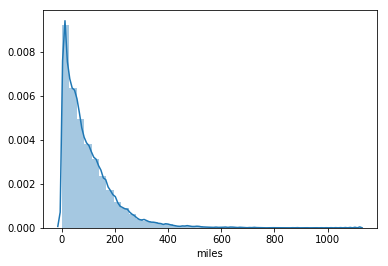

In [10]:
sns.distplot(df1['miles'], bins=40)

In [11]:
df2 = df1.groupby(['trip_id']).sum()

In [12]:
df2

,trip_seq,load_id,o_loc_id,d_loc_id,miles,dwell,week,year,o_lat,o_lon,d_lat,d_lon
trip_id,,,,,,,,,,,,
90297215,3,59985687,15219,15237,646.0,26.0,2,4038,80.1830,-151.9254,85.7759,-148.9946
90322675,6,124779559,47646570,47647504,564.0,76.0,3,6057,126.9882,-223.7756,129.8902,-218.5657
90330536,3,59710870,15276,15292,215.0,36.0,2,4038,84.1487,-149.7961,85.9753,-148.7967
90331092,3,59710771,15276,15234,287.0,35.0,2,4038,84.1487,-149.7961,86.1620,-149.7063
90363620,3,62099893,15276,15234,297.0,30.0,2,4038,84.1487,-149.7961,86.1620,-149.7063
90365028,3,59711151,15276,15292,210.0,73.0,2,4038,84.1487,-149.7961,85.9753,-148.7967
90366534,6,125023656,47646513,47646586,672.0,72.0,3,6057,123.0225,-225.9049,128.8148,-222.7762
90378987,10,124930270,3285880,3284915,787.0,149.0,4,8076,165.4441,-302.4601,168.2453,-298.9432
90379241,3,62132583,16241,15237,585.0,23.0,2,4038,81.3475,-153.3130,85.7759,-148.9946


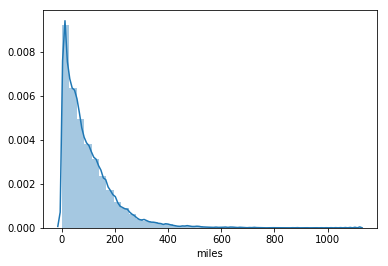

In [13]:
sns.distplot(df1['miles'], bins=40)

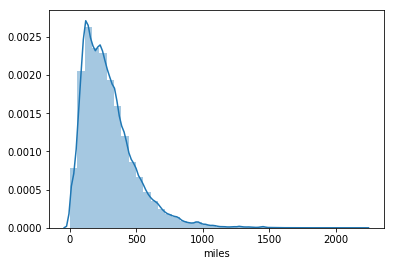

In [14]:
sns.distplot(df2['miles'], bins=40)

In [18]:
df3 = df1.groupby(['o_loc_zip']).count()

In [22]:
df3.sort_values(by=['trip_id'], ascending=False)

,trip_id,bt_date,trip_seq,load_id,o_loc_id,o_loc_type_code,d_loc_id,d_loc_type_code,o_activity_ts,o_ac_type_code,...,o_lat,o_lon,o_city,o_state,d_lat,d_lon,d_city,d_state,d_loc_zip,miles_type
o_loc_zip,,,,,,,,,,,,,,,,,,,,,
76266,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114,...,3114,3114,3114,3114,3114,3114,3114,3114,3114,3114
17901,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080,...,3080,3080,3080,3080,3080,3080,3080,3080,3080,3080
17901,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048,...,3048,3048,3048,3048,3048,3048,3048,3048,3048,3048
12095,2808,2808,2808,2808,2808,2808,2808,2808,2808,2808,...,2808,2808,2808,2808,2808,2808,2808,2808,2808,2808
46933,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772,...,2772,2772,2772,2772,2772,2772,2772,2772,2772,2772
54660,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739,...,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739
61081,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728,...,2728,2728,2728,2728,2728,2728,2728,2728,2728,2728
33881,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719,...,2719,2719,2719,2719,2719,2719,2719,2719,2719,2719
43123,2695,2695,2695,2695,2695,2695,2695,2695,2695,2695,...,2695,2695,2695,2695,2695,2695,2695,2695,2695,2695
